<a href="https://colab.research.google.com/github/tamdoancong/5215-MachineLearning-Doan/blob/master/TamDoan_PerceptronEdit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
#this code sets the font size globaly for matplotlib
plt.rcParams.update({'font.size': 18})

## Data initialization

In [123]:
data=pd.DataFrame()
data["x1"]=[0.5,0.4,0.4,0.6,0.6,1.5,1.4,1.4,1.6,1.6]
data["x2"]=[0.5,0.4,0.6,0.4,0.6,1.5,1.4,1.6,1.4,1.6]
data["y"]=[1,1,1,1,1,-1,-1,-1,-1,-1]
data["x0"]=1
data[['x0','x1','x2','y']]
data

,x1,x2,y,x0
0,0.5,0.5,1,1
1,0.4,0.4,1,1
2,0.4,0.6,1,1
3,0.6,0.4,1,1
4,0.6,0.6,1,1
5,1.5,1.5,-1,1
6,1.4,1.4,-1,1
7,1.4,1.6,-1,1
8,1.6,1.4,-1,1
9,1.6,1.6,-1,1


##weight initializatio

In [124]:
len(data. columns) 


4

In [125]:
# Weight initialization, normally choose close to 0
w=[]
for i in range(0,len(data. columns)-1 ):
  w.append(random.random())
w

[0.7781398137929841, 0.12100495787170396, 0.3649315699894137]

# Draw the decision boundary

In [126]:
def Fx2(x1):
  x2=(-w[0]-w[1]*x1)/w[2]
  return  x2

In [127]:
x1=data['x1']

In [128]:
Fx2(x1)

0   -2.298081
1   -2.264923
2   -2.264923
3   -2.331239
4   -2.331239
5   -2.629664
6   -2.596505
7   -2.596505
8   -2.662822
9   -2.662822
Name: x1, dtype: float64

##draw the plot

In [129]:
def draw(data):
  fig, (ax1) = plt.subplots(1, figsize=(4, 10))
  ax1.scatter(    data[data["y"]==1]['x1'], 
                  data[data["y"]==1]["x2"], 
                  s=100,
                  c = "green", 
                  marker = "+")
  ax1.scatter(    data[data["y"]==-1]["x1"], 
                  data[data["y"]==-1]["x2"], 
                  s=100,
                  c = "orange", 
                  marker = "_")
  ax1.set_xlim(0,2)
  ax1.set_ylim(-4,4)
  ax1.set_xlabel('x1')
  ax1.set_ylabel('x2')
  ax1.grid(True)
  x1 = np.linspace(0, 2, 1000)
  ax1.plot(x1, Fx2(x1));
  plt.show()

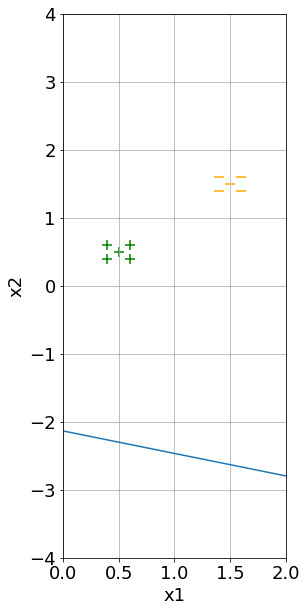

In [130]:
draw(data)

## Update Weight

In [131]:
#fuction update weight
def update_w( w,learning_rate,num):
  # get y from data frame 
  y=data['y'].to_numpy()
  # put x0, x1,x2 in numpy array
  X=data[["x0","x1","x2"]].to_numpy()
  # y_predict 
  y_predict=np.sign(np.dot(X,w))
  
  error=y-y_predict
  
  
  for i in range(num):
    if error.sum()!=0:
      w+=np.dot(learning_rate*error,X)
      y_predict=np.sign(np.dot(X,w))
      error=y-y_predict
      print(error.sum())
  return w
      
  
      
  
  

  



In [132]:
#call update_w function
update_w(w,.01,100)

-10.0
-10.0
0.0


array([ 0.47813981, -0.32899504, -0.08506843])

In [133]:
#update w after call update_w function 
w=update_w(w,.01,100)
w

-10.0
-10.0
0.0


array([ 0.47813981, -0.32899504, -0.08506843])

In [134]:
# call Fx2 function with w update
Fx2(x1)

0    3.686941
1    4.073683
2    4.073683
3    3.300199
4    3.300199
5   -0.180475
6    0.206266
7    0.206266
8   -0.567217
9   -0.567217
Name: x1, dtype: float64

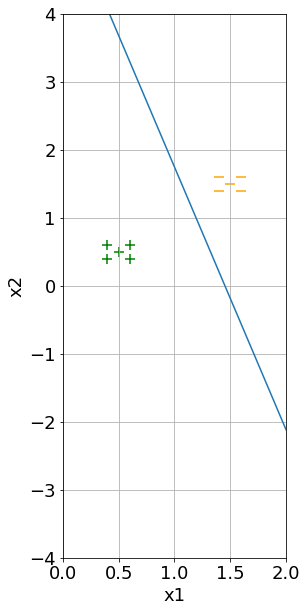

In [135]:
#draw with update w 
draw(data)